##  Import Dependencies and Create Alpaca API Environment

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Retrieve 10 Years Worth of Stock Data via API Call and Read in as DataFrame

In [21]:
# Set the ticker
ticker = ["AMZN", "BABA", "TSLA", "FB", "NVDA", "AMD", "IGLB", "SPLB", "VCLT", "BND"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2010-11-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

AMD                                AMZN          \
                           open  high   low close    volume    open    high   
2010-11-04 00:00:00-04:00  7.71  8.00  7.67  8.00  28346169  169.86  172.53   
2010-11-05 00:00:00-04:00  8.03  8.16  7.97  8.04  23850730  169.31  171.65   
2010-11-08 00:00:00-05:00  8.05  8.22  8.03  8.14  27735943  170.84  173.20   
2010-11-09 00:00:00-05:00  8.22  8.24  7.85  7.92  41599869  172.67  173.14   
2010-11-10 00:00:00-05:00  7.89  7.94  7.70  7.74  29985761  170.47  173.37   

                                                    ...   TSLA         \
                              low   close   volume  ...   open   high   
2010-11-04 00:00:00-04:00  168.40  168.94  6215890  ...  22.60  25.33   
2010-11-05 00:00:00-04:00  168.59  170.36  4956327  ...  24.87  25.00   
2010-11-08 00:00:00-05:00  168.78  172.06  5300695  ...  24.50  25.00   
2010-11-09 00:00:00-05:00  169.06  170.27  3781735  ...  25.00  25.69   
2010-11-10 00:00:00-05:00  169.41  173.34  5188027  ...  24.48  29.97   

                                                     VCLT                 \
                               low  close   volume   open   high     low   
2010-11-04 00:00:00-04:00  22.1510  24.90  1777449  79.89  80.53  79.890   
2010-11-05 00:00:00-04:00  23.7200  24.44   985044  79.13  79.95  79.130   
2010-11-08 00:00:00-05:00  24.0300  24.98   491058  80.03  80.37  79.642   
2010-11-09 00:00:00-05:00  24.0501  24.69   831711  79.94  79.94  78.420   
2010-11-10 00:00:00-05:00  24.0500  29.32  2959270  78.70  78.75  77.500   

                                         
                           close volume  
2010-11-04 00:00:00-04:00  80.41  17305  
2010-11-05 00:00:00-04:00  79.66  12535  
2010-11-08 00:00:00-05:00  79.75  16266  
2010-11-09 00:00:00-05:00  78.42  27920  
2010-11-10 00:00:00-05:00  78.41  20324  

[5 rows x 50 columns]

###  Run the Monte Carlo Simulation

In [23]:




# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.10, .10, .10, .10, .10, .10, .10, .10, .10, .10],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [24]:
# Printing the simulation input data
MC_portfolio.portfolio_data.head(10)

AMD                                            \
                           open  high   low  close    volume daily_return   
2010-11-04 00:00:00-04:00  7.71  8.00  7.67  8.000  28346169          NaN   
2010-11-05 00:00:00-04:00  8.03  8.16  7.97  8.040  23850730     0.005000   
2010-11-08 00:00:00-05:00  8.05  8.22  8.03  8.140  27735943     0.012438   
2010-11-09 00:00:00-05:00  8.22  8.24  7.85  7.920  41599869    -0.027027   
2010-11-10 00:00:00-05:00  7.89  7.94  7.70  7.740  29985761    -0.022727   
2010-11-11 00:00:00-05:00  7.56  7.68  7.46  7.640  17178873    -0.012920   
2010-11-12 00:00:00-05:00  7.59  7.85  7.50  7.630  32983106    -0.001309   
2010-11-15 00:00:00-05:00  7.75  7.82  7.56  7.579  14847189    -0.006684   
2010-11-16 00:00:00-05:00  7.48  7.65  7.42  7.430  23391347    -0.019660   
2010-11-17 00:00:00-05:00  7.32  7.43  7.24  7.320  16978954    -0.014805   

                             AMZN                            ...     TSLA  \
                             open    high       low   close  ...      low   
2010-11-04 00:00:00-04:00  169.86  172.53  168.4000  168.94  ...  22.1510   
2010-11-05 00:00:00-04:00  169.31  171.65  168.5900  170.36  ...  23.7200   
2010-11-08 00:00:00-05:00  170.84  173.20  168.7800  172.06  ...  24.0300   
2010-11-09 00:00:00-05:00  172.67  173.14  169.0600  170.27  ...  24.0501   
2010-11-10 00:00:00-05:00  170.47  173.37  169.4100  173.34  ...  24.0500   
2010-11-11 00:00:00-05:00  170.99  172.05  169.4201  170.39  ...  27.3300   
2010-11-12 00:00:00-05:00  170.12  171.26  165.0500  165.69  ...  28.0700   
2010-11-15 00:00:00-05:00  165.16  165.35  158.5600  158.89  ...  30.2200   
2010-11-16 00:00:00-05:00  158.74  160.91  156.7700  157.79  ...  28.4200   
2010-11-17 00:00:00-05:00  157.84  160.85  157.5500  158.36  ...  28.6100   

                                                           VCLT         \
                             close   volume daily_return   open   high   
2010-11-04 00:00:00-04:00  24.9000  1777449          NaN  79.89  80.53   
2010-11-05 00:00:00-04:00  24.4400   985044    -0.018474  79.13  79.95   
2010-11-08 00:00:00-05:00  24.9800   491058     0.022095  80.03  80.37   
2010-11-09 00:00:00-05:00  24.6900   831711    -0.011609  79.94  79.94   
2010-11-10 00:00:00-05:00  29.3200  2959270     0.187525  78.70  78.75   
2010-11-11 00:00:00-05:00  28.0000  1915947    -0.045020  78.45  78.63   
2010-11-12 00:00:00-05:00  29.7600  2706076     0.062857  78.23  78.30   
2010-11-15 00:00:00-05:00  30.8000  2600216     0.034946  77.67  77.72   
2010-11-16 00:00:00-05:00  29.6899  1326280    -0.036042  76.88  77.87   
2010-11-17 00:00:00-05:00  29.4400   727754    -0.008417  77.96  78.17   

                                                               
                              low   close volume daily_return  
2010-11-04 00:00:00-04:00  79.890  80.410  17305          NaN  
2010-11-05 00:00:00-04:00  79.130  79.660  12535    -0.009327  
2010-11-08 00:00:00-05:00  79.642  79.750  16266     0.001130  
2010-11-09 00:00:00-05:00  78.420  78.420  27920    -0.016677  
2010-11-10 00:00:00-05:00  77.500  78.410  20324    -0.000128  
2010-11-11 00:00:00-05:00  77.630  78.190   4262    -0.002806  
2010-11-12 00:00:00-05:00  77.750  77.761   1851    -0.005487  
2010-11-15 00:00:00-05:00  76.450  76.510  19481    -0.016088  
2010-11-16 00:00:00-05:00  76.560  77.770  21406     0.016468  
2010-11-17 00:00:00-05:00  77.588  77.640   6491    -0.001672  

[10 rows x 60 columns]

In [25]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.136540,0.878308,1.155965,0.958745,1.054420,1.042751,1.028478,1.050670,1.204650,0.911330,...,1.051164,1.114626,0.974443,1.089332,1.006183,0.902935,0.946370,0.875686,0.895777,1.119428
2,1.091329,0.710435,1.200651,0.992863,1.135156,1.006889,1.064300,1.144095,1.312158,0.853423,...,1.140503,1.220370,1.175291,1.068395,0.963966,0.816105,0.901262,0.831774,0.761674,1.256856
3,1.118722,0.738514,1.274211,1.108014,1.247596,0.997887,1.078397,1.083406,1.296228,0.883311,...,1.276840,1.356612,1.043754,1.315254,0.874919,0.720296,0.964742,0.711622,0.773372,1.342869
4,1.145366,0.774860,1.156559,1.105536,1.295178,1.113007,0.990081,1.105142,1.286121,0.992322,...,1.458358,1.361781,1.087558,1.250173,0.927637,0.589620,0.898229,0.725894,0.789682,1.450954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.002634,0.623363,280.814245,0.001477,2.371233,0.067839,0.837460,0.032757,20.586433,29.699013,...,5.002632,3.890371,0.201517,0.060882,0.042123,5.534532,0.000311,63.251079,0.028727,1124.600178
2517,0.002542,0.637631,254.413183,0.001484,2.566814,0.078024,0.780053,0.037780,21.294129,32.943428,...,5.511470,3.627741,0.190558,0.060855,0.036413,6.281738,0.000302,61.680844,0.026926,1122.597611
2518,0.002649,0.659937,253.214903,0.001508,2.375839,0.077922,0.843613,0.042213,21.817148,34.779692,...,5.819923,3.398604,0.162086,0.052966,0.033094,6.992426,0.000321,62.247981,0.027881,1103.459394
2519,0.002772,0.706406,246.253128,0.001568,2.438970,0.078913,0.852009,0.045543,23.082343,33.394860,...,5.616207,3.599048,0.176379,0.048538,0.034936,6.331038,0.000323,51.220298,0.028385,1202.265544


### Create a new DataFrame to hold the summary statistics for the simulated daily returns.

In [26]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_portfolio.simulated_return.mean(axis=1)),
    "median": list(MC_portfolio.simulated_return.median(axis=1)),
    "min": list(MC_portfolio.simulated_return.min(axis=1)),
    "max": list(MC_portfolio.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001601,1.002935,0.739281,1.268176
2,1.005433,0.998621,0.670172,1.400364
3,1.010286,1.004620,0.601445,1.502552
4,1.012629,1.002506,0.577795,1.604733


###  Generate a line plot to visualize the summary statistics for the simulated daily returns

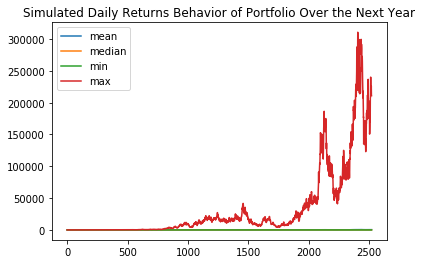

In [27]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of Portfolio Over the Next Year")

### Create a new DataFrame to hold the summary statistics for the simulated daily returns assuming an initial investment of $100,000

In [28]:
 # Set initial investment
initial_investment = 1000

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,1000.000000,1000.000000,1000.000000,1000.000000
1,1001.601142,1002.934779,739.280858,1268.175823
2,1005.432632,998.620832,670.171751,1400.364403
3,1010.286421,1004.620131,601.444906,1502.552156
4,1012.628913,1002.505508,577.794672,1604.732752


### Generate a line plot to visualize the updated summary statistics for simulated daily returns using a $100,000 initial investment

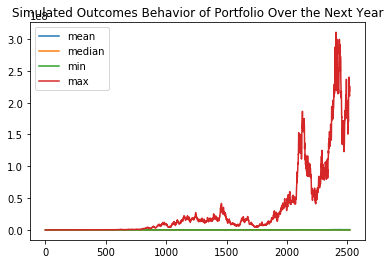

In [33]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of Portfolio Over the Next Year")

### Calculate the range of possible outcomes for our $100,000 investment with a 95% confidence interval


In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1.000000e+03
mean            4.231302e+02
std             7.258277e+03
min             1.365621e-07
25%             7.001329e-03
50%             9.445554e-02
75%             1.895168e+00
max             2.110276e+05
95% CI Lower    4.930438e-05
95% CI Upper    2.510861e+02
Name: 2520, dtype: float64


In [31]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*1000,2)
ci_upper = round(tbl[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.") 

There is a 95% chance that an initial investment of $1000 in the portfolio over the next year will end within in the range of $0.05 and $251086.05.
